# CaBER Image Processing

In [2]:
import sys
sys.path.append('../') # Remove in your own code

In [ ]:
from image import Image # In your own code, change to: "from caber_image_processing import Image"

In this example script, the processing of a CaBER experiment image is shown. The image is analyzed in order to calculate the minimum radius of thinning at the given frame. Multiple frames can be processed in order to create a dataset of radius vs time. To begin, import an image from a sample dataset or your own file destination.

In [3]:
# Set path to image
image_path = '../data/sample_frames/0240.tif'

Once the image location has been designated, the image object must be created according to the library's Image class definition. There are many optional configuration parameters, in this example we will explore just a few. Detailed explanation of other parameters can be found in the library's documentation.

By default, the user will be prompted to crop their image to the exact width the fluid. The width of this crop should be provided in meters (all inputs should be in SI units). The degree of the polynomial edge approximation can also be changed but is defaulted to 4. To create this polynomial, only the middle 40% of the edge points is used. This percentage can be expanded too.

In [4]:
crop_width = 6*(10**(-3)) # Must be in meters (all inputs should be standard SI units)
polynomial_degree = 4 # For edge approximation
vertical_percentage_to_consider = 0.4 # Middle percentage of picture height to consider, should contain the necessary part of the fluid (where a minimum radius may be)

In [5]:
# Construct image object
im = Image(image_path, width=crop_width, poly_degree=polynomial_degree, pct_considered=vertical_percentage_to_consider)

Now, the image is created and the user should be prompted to crop it to the widest part of the fluid. Press enter when the box is correctly sized.

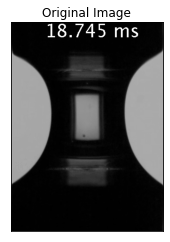

In [6]:
# Display the original image
im.show_image()

Above is a sample of a cropped raw image. As you can see, fluid features are properly captured and nothing is left outside of the frame.

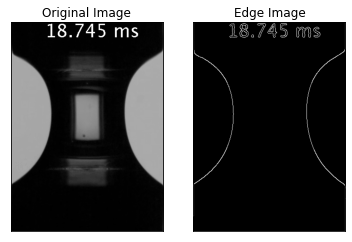

In [7]:
# Display the image after being passed through a Canny filter to highlight edges
im.show_edge_image()

Standard Canny edge-finding filter is applied to the image to highlight edges of image. In this particular frame, the edges of a timestamp at the top are also highlight but these will be discarded in the next step of processing. Threshold's for the filter can be adjusted when the Image object is instantiated.

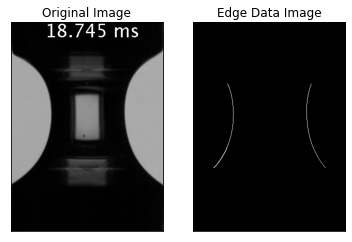

In [8]:
# Display the data that's extracted from this image
im.show_edge_data_image()

Now, the middle 40% of the found edge points have been selected. This percentage can be expanded but likely should not exceed 60%. Upon changing this percentage, make sure to check your image to ensure that proper features are being captured. Checking can be done by running the show_edge_data_image command utilized above. This percentage can be small because it assumed the minimal radius lies somewhere close to the middle of the image (in the vertical direction).

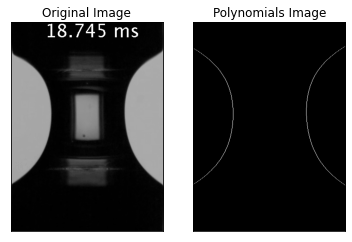

In [9]:
# Display the polynomial approximations to these edges
im.show_poly_image()

The selected datapoints are used to fit polynomials for each edge of the specified degree. The minimum distance of these polynomials over the height of the image is used to determine the minimum radius is meters. If the width of the crop is not correctly specified, the returned radius will be in the wrong units.

In [10]:
# Minimum radius across the middle of the fluid image
minimum_radius = im.radius # In meters